In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
#import missingno as msno # to get visualization on missing values



In [2]:
data=pd.read_csv('car_sales.csv')

In [3]:
data

,Brand Name,Price,Body Style,Mileage,EngineV,Fuel Type,Registration,Production Date,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


# Lets create code to know about descriptive statistics to spot the problems

In [4]:
data.describe(include='all')

,Brand Name,Price,Body Style,Mileage,EngineV,Fuel Type,Registration,Production Date,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# A lot of information was given about Model by Brand Name, so i will drope the Model column

In [5]:
data.drop(['Model'],axis=1)
df=data.copy()
df.describe(include='all')

,Brand Name,Price,Body Style,Mileage,EngineV,Fuel Type,Registration,Production Date,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
print ("Rows     : " , df.shape[0])  #get number of rows/observations
print ("Columns  : " , df.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", df.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", df.nunique())  #  count of unique values

Rows     :  4345
Columns  :  9
######################################## 
 Features : 

 ['Brand Name', 'Price', 'Body Style', 'Mileage', 'EngineV', 'Fuel Type', 'Registration', 'Production Date', 'Model']
######################################## 
Missing values :

 Price              172
EngineV            150
Model                0
Production Date      0
Registration         0
Fuel Type            0
Mileage              0
Body Style           0
Brand Name           0
dtype: int64
######################################## 
Percent of missing :

 Brand Name         0.00
Price              3.96
Body Style         0.00
Mileage            0.00
EngineV            3.45
Fuel Type          0.00
Registration       0.00
Production Date    0.00
Model              0.00
dtype: float64
######################################## 
Unique values :  

 Brand Name           7
Price              906
Body Style           6
Mileage            410
EngineV             73
Fuel Type            4
Registration      

# Let's deal with missing values

In [7]:
df.isnull().sum()

Brand Name           0
Price              172
Body Style           0
Mileage              0
EngineV            150
Fuel Type            0
Registration         0
Production Date      0
Model                0
dtype: int64

In [8]:
#msno.bar(df)

# Remove some missing values 
#### As a rule of thumb, if less than 5% of the observations are missing, the missing data can simply be deleted without any significant ramifications

In [9]:
df_no_mv = df.dropna(how='any', axis=0)

In [10]:
df_no_mv.describe(include='all')

,Brand Name,Price,Body Style,Mileage,EngineV,Fuel Type,Registration,Production Date,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


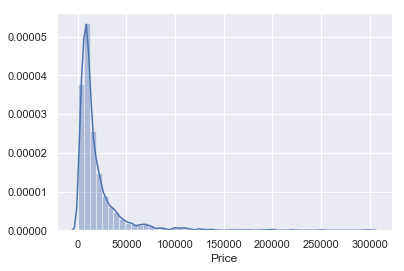

In [11]:
sns.distplot(df_no_mv['Price'])

In [12]:
print("Skewness: %f" % df_no_mv['Price'].skew())
print("Kurtosis: %f" % df_no_mv['Price'].kurt())

Skewness: 4.444409
Kurtosis: 28.929701


#### Log transformation helps reducing skewness when we have skewed data, I decided to use Log transformation now but it is possible to use it later as well

In [13]:
df_no_mv['Price'] = np.log(df_no_mv['Price'])

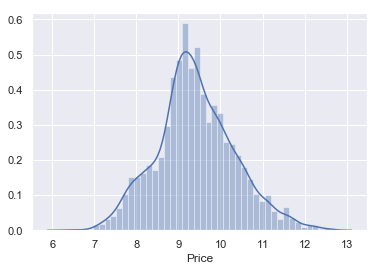

In [14]:
sns.distplot(df_no_mv['Price'])

In [15]:
df_no_mv.columns.values

array(['Brand Name', 'Price', 'Body Style', 'Mileage', 'EngineV',
       'Fuel Type', 'Registration', 'Production Date', 'Model'],
      dtype=object)

# For a good result, i am looking a for normal distrubution, so trying to remove top 1% observations to reduce outliers

In [16]:
q = df_no_mv['Price'].quantile(0.99)
data1 = df_no_mv[df_no_mv['Price']<q]
data1.describe(include='all')

,Brand Name,Price,Body Style,Mileage,EngineV,Fuel Type,Registration,Production Date,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,9.381943,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,0.896449,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,6.396930,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,8.850801,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,9.341369,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,9.952278,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


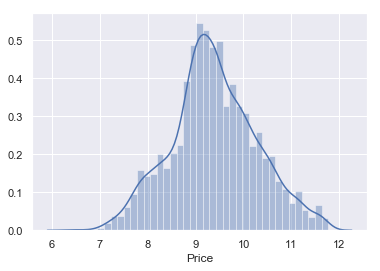

In [17]:
sns.distplot(data1['Price'])

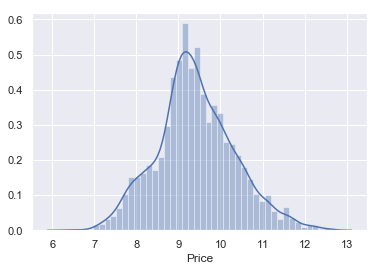

In [18]:
sns.distplot(df_no_mv['Price'], fit=None)

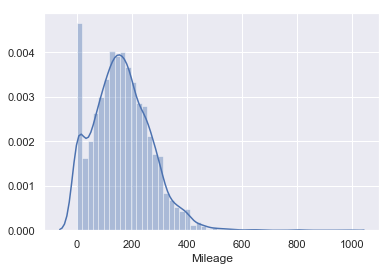

In [19]:
sns.distplot(df_no_mv['Mileage'])

In [20]:
q = data1['Mileage'].quantile(0.99)
data2 = data1[data1['Mileage']<q]

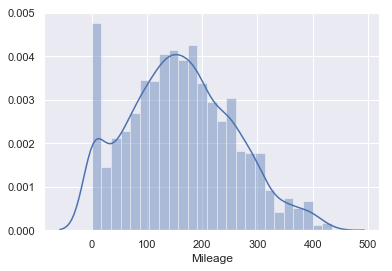

In [21]:
sns.distplot(data2['Mileage'])

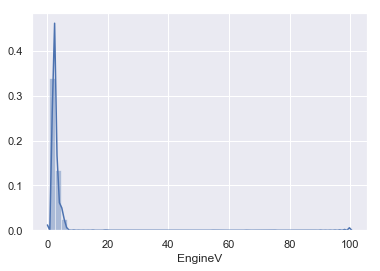

In [22]:
sns.distplot(df_no_mv['EngineV'])

# Engine displacement has wrong values, so let's correct this value
### an interval where engine volume should normally fall is 0.6 to 6.5

In [23]:
data3=data2[data2['EngineV']<6.5]

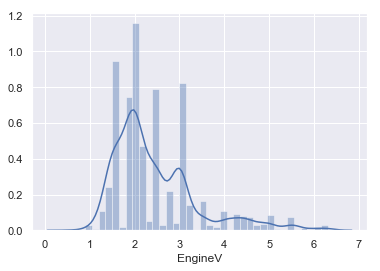

In [24]:
sns.distplot(data3['EngineV'])

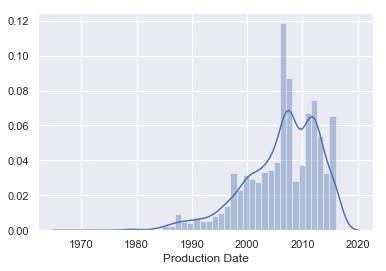

In [25]:
sns.distplot(df_no_mv['Production Date'])

# Production Date has lower end ourlier, so im doing to use this code

In [26]:
q=data3['Production Date'].quantile(0.01)
data4=data3[data3['Production Date']>q]

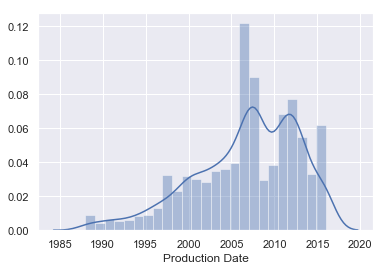

In [27]:
sns.distplot(data4['Production Date'])

In [28]:
data_cleaned = data4.reset_index(drop=True)

In [29]:
data_cleaned.Model.nunique()

291

In [30]:
data_cleaned.groupby('Model')['Model'].size().nlargest(30)

Model
E-Class               181
Vito                  154
A6                    153
Kangoo                132
Camry                 127
Caddy                 110
X5                    110
Megane                 85
Land Cruiser Prado     75
520                    74
Trafic                 70
Touareg                65
Passat B6              61
Polo                   59
Q7                     57
320                    56
T5 (Transporter)       55
A4                     54
Passat B5              54
C-Class                52
525                    51
Rav 4                  50
530                    49
Lancer                 49
Lancer X               49
Pajero Wagon           48
Passat B7              48
Corolla                46
S 500                  40
Jetta                  38
Name: Model, dtype: int64

In [31]:
data_cleaned.describe(include='all')

,Brand Name,Price,Body Style,Mileage,EngineV,Fuel Type,Registration,Production Date,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,9.415703,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,0.876616,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,6.684612,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,8.881836,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,9.367344,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,9.985068,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


# It was all about data preprocessing, now it is time to visualize data

# lets see OLS assumption

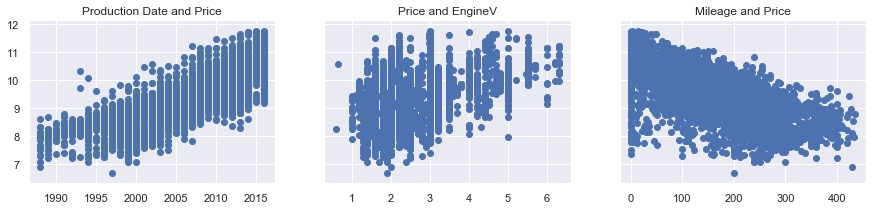

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Production Date'],data_cleaned['Price'])
ax1.set_title('Production Date and Price')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Mileage and Price')

plt.show()

## It is just additional vizualization to check normality one more time 

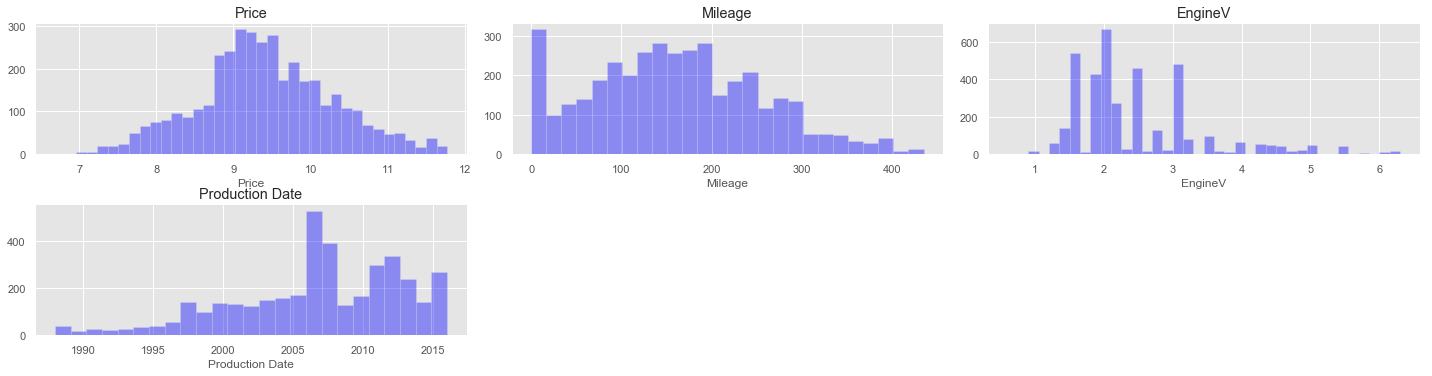

In [33]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = data_cleaned.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(data_cleaned[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

##### Normality has been checked, homoscedasticity generally holds as I already implemented log transformation which is common fix for heteroscedaticity

In [34]:
print("Find most important features relative to Price-target")
corr = data_cleaned.corr()
corr.sort_values(["Production Date"], ascending = True, inplace = True)
print(corr.Price)

Find most important features relative to Price-target
Mileage           -0.614806
EngineV            0.411935
Price              1.000000
Production Date    0.746907
Name: Price, dtype: float64


In [35]:
#data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [36]:
data_cleaned.columns.values

array(['Brand Name', 'Price', 'Body Style', 'Mileage', 'EngineV',
       'Fuel Type', 'Registration', 'Production Date', 'Model'],
      dtype=object)

# VIF is a tool to identify the degree of multicollinearity. 
##### detecting multicollinearity is important becouse it does reduce  the statistical significancy of the independent variable, but it does not reduce the explanatory power of model. Sklearn does not have any tool for this problem, so I am going to use statsmodels

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
variables=data_cleaned[['Mileage', 'EngineV','Production Date',]]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values, i) for i in range (variables.shape[1])]
vif['features']=variables.columns

In [38]:
vif

,VIF,features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Production Date


### Production Date is definetly more corralated with other variables, so lets drop this column

In [39]:
 data_no_multicollinearity=data_cleaned.drop(['Production Date'],axis=1)

## pd.get_dummies(df[drop_first]) recognize all categorical variables and create dummies automaticly

In [40]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [41]:
data_with_dummies

,Price,Mileage,EngineV,Brand Name_BMW,Brand Name_Mercedes-Benz,Brand Name_Mitsubishi,Brand Name_Renault,Brand Name_Toyota,Brand Name_Volkswagen,Body Style_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.90,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9.560997,200,2.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9.287209,193,1.50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7.244228,212,1.80,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9.388487,177,1.50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,7.824046,260,1.79,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Above code added the dummy variable in form of 0 and 1, which is easy to interpret for the regression model.

In [42]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Brand Name_BMW',
       'Brand Name_Mercedes-Benz', 'Brand Name_Mitsubishi',
       'Brand Name_Renault', 'Brand Name_Toyota', 'Brand Name_Volkswagen',
       'Body Style_hatch', 'Body Style_other', 'Body Style_sedan',
       'Body Style_vagon', 'Body Style_van', 'Fuel Type_Gas',
       'Fuel Type_Other', 'Fuel Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630'

In [43]:
cols=['Price','Mileage', 'EngineV',  'Brand Name_BMW',
       'Brand Name_Mercedes-Benz', 'Brand Name_Mitsubishi',
       'Brand Name_Renault', 'Brand Name_Toyota', 'Brand Name_Volkswagen',
       'Body Style_hatch', 'Body Style_other', 'Body Style_sedan',
       'Body Style_vagon', 'Body Style_van', 'Fuel Type_Gas',
       'Fuel Type_Other', 'Fuel Type_Petrol', 'Registration_yes']

In [44]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Price,Mileage,EngineV,Brand Name_BMW,Brand Name_Mercedes-Benz,Brand Name_Mitsubishi,Brand Name_Renault,Brand Name_Toyota,Brand Name_Volkswagen,Body Style_hatch,Body Style_other,Body Style_sedan,Body Style_vagon,Body Style_van,Fuel Type_Gas,Fuel Type_Other,Fuel Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

In [45]:
targets=data_preprocessed['Price']
inputs=data_preprocessed.drop(['Price'], axis=1)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
input_scaled=scaler.transform(inputs)

In [49]:
from sklearn.feature_selection import f_regression

In [50]:
f_regression(input_scaled,targets)

(array([2348.68929931,  789.888682  ,   31.82907337,   63.04307266,
          25.43007179,  174.4228831 ,   86.89409102,   43.84033485,
          75.51499679,    4.47798855,   68.39846543,  128.30541604,
          59.54688724,   29.77594278,    3.69629082,    6.94646292,
        1054.53025797]),
 array([0.00000000e+000, 2.65855077e-158, 1.80420259e-008, 2.62901969e-015,
        4.79766231e-007, 5.52787198e-039, 1.87306983e-020, 4.05331961e-011,
        5.26975221e-018, 3.43978741e-002, 1.81728039e-016, 2.77241307e-029,
        1.50990623e-014, 5.15395626e-008, 5.46069820e-002, 8.43206723e-003,
        9.25417095e-205]))

In [51]:
p_values = f_regression(inputs,targets)[1]
p_values

array([0.00000000e+000, 2.65855077e-158, 1.80420259e-008, 2.62901969e-015,
       4.79766231e-007, 5.52787198e-039, 1.87306983e-020, 4.05331961e-011,
       5.26975221e-018, 3.43978741e-002, 1.81728039e-016, 2.77241307e-029,
       1.50990623e-014, 5.15395626e-008, 5.46069820e-002, 8.43206723e-003,
       9.25417095e-205])

In [52]:
p_values.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.034, 0.   , 0.   , 0.   , 0.   , 0.055, 0.008, 0.   ])

### testing 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test=train_test_split(input_scaled, targets, test_size=0.2, random_state=365)

In [55]:
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
y_hat=reg.predict(x_train)

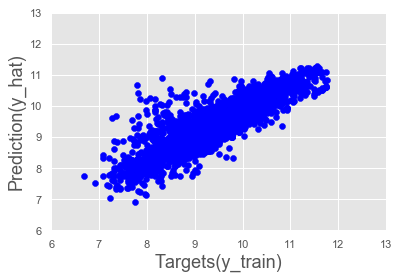

In [57]:
plt.scatter(y_train, y_hat, color='blue')
plt.xlabel('Targets(y_train)', size=18)
plt.ylabel('Prediction(y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### Points situated around 45 degree line, so model passed from first check
### Another check is Residual which is differences between the targets and the predictions

0.744996578792662

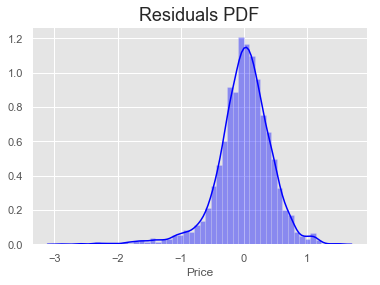

In [58]:
sns.distplot(y_train-y_hat, color='blue')
plt.title('Residuals PDF',size=18)

reg.score(x_train,y_train)

In [59]:
reg.intercept_

9.415239458021299

In [60]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [61]:
reg_summary=pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand Name_BMW,0.014250
3,Brand Name_Mercedes-Benz,0.012882
4,Brand Name_Mitsubishi,-0.140552
5,Brand Name_Renault,-0.179909
6,Brand Name_Toyota,-0.060550
7,Brand Name_Volkswagen,-0.089924
8,Body Style_hatch,-0.145469
9,Body Style_other,-0.101444


In [62]:
data_cleaned['Body Style'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

### Testing

In [63]:
y_hat_test=reg.predict(x_test)

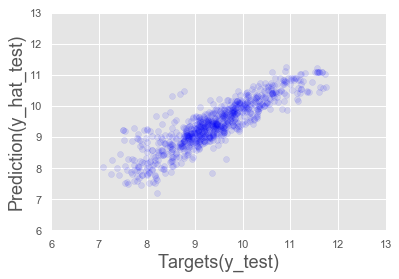

In [64]:
plt.scatter(y_test, y_hat_test, color='blue', alpha=0.1)
plt.xlabel('Targets(y_test)', size=18)
plt.ylabel('Prediction(y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#### The more saturated the colour, the higher the consentration for the line 

In [65]:
df_pf=pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [66]:
df_pf.describe()

,Predictions
count,774.000000
mean,15946.760167
std,13133.197604
min,1320.562768
25%,7413.644234
50%,11568.168859
75%,20162.408805
max,77403.055224


In [67]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
5,21289.799394,14200.0
6,20159.189144,NaN
7,20349.617702,NaN
8,11581.537864,11950.0
9,33614.617349,NaN


In [68]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: Price, dtype: float64

In [69]:
df_pf['Target'] = np.exp(y_test)

In [70]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions'] 

In [71]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
5,21289.799394,20000.0,-1289.799394,6.448997
6,20159.189144,38888.0,18728.810856,48.160900
7,20349.617702,16999.0,-3350.617702,19.710675
8,11581.537864,12500.0,918.462136,7.347697
9,33614.617349,41000.0,7385.382651,18.013128


In [72]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


######  Important note is that all reseduals buttom side are neagtive, so our predictions are higher then our targets, this model is good at  predicting price  but it is not perfect at the same time, I can say that model is needed some other factor which drives prices of used cars  lower 